In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor

In [3]:
od.download("https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset")

Skipping, found downloaded files in "./food-delivery-dataset" (use force=True to force download)


In [4]:
!pip install transformers
!pip install torch
!pip install datasets


# **Read Data**

In [5]:
train_df= pd.read_csv("/content/food-delivery-dataset/train.csv")

In [6]:
train_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

# **Clean Data**

**Categorical Values**

In [8]:
# Count of unique values in categorical columns
categorical_counts = train_df.select_dtypes(include=['object']).nunique()

# Display the counts
print(categorical_counts)


ID                         45593
Delivery_person_ID          1320
Delivery_person_Age           23
Delivery_person_Ratings       29
Order_Date                    44
Time_Orderd                  177
Time_Order_picked            193
Weatherconditions              7
Road_traffic_density           5
Type_of_order                  4
Type_of_vehicle                4
multiple_deliveries            5
Festival                       3
City                           4
Time_taken(min)               45
dtype: int64


**Unique count**

In [9]:
train_df["Weatherconditions"].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [10]:
train_df["Delivery_person_Age"].unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', 'NaN ', '28', '39', '30', '15',
       '50'], dtype=object)

In [11]:
train_df["Festival"].unique()

array(['No ', 'Yes ', 'NaN '], dtype=object)

✅  We can spot some string "Null" values. We need to remove them

✅  We need to modify weatherconditions feature

**Modify Weather Feature**

In [12]:
train_df["Weatherconditions"] = train_df["Weatherconditions"].apply(lambda x: x[len("conditions "):])
train_df["Weatherconditions"].replace("NaN", np.nan, inplace=True)

**Replace string Null values with object Null**

In [13]:
train_df.replace("NaN ", np.nan, inplace=True)
train_df.replace("NaN", np.nan, inplace=True)

train_df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

**Implementing Imputation**

Here, for numerical variables, mean imputation will be used. and for categorical variables, I will use mode imputation

In [14]:
numerical_cols= ["Delivery_person_Age", "Delivery_person_Ratings"]
categorical_cols= ["Weatherconditions", "Road_traffic_density", "multiple_deliveries", "Festival", "City"]

In [15]:
# Rest of the columns
non_imputed_cols = [col for col in train_df.columns if col not in numerical_cols + categorical_cols]


In [16]:
# initialize imputer
num_imputer= SimpleImputer(strategy='mean')
cat_imputer= SimpleImputer(strategy='most_frequent')

In [17]:
# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', num_imputer, numerical_cols),
        ('categorical', cat_imputer, categorical_cols)
    ],
    # To keep the non-imputed columns after transformation
    remainder='passthrough'
)

In [18]:
# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [19]:
# Fit and transform the data
train_df_transformed = pipeline.fit_transform(train_df)


In [20]:
print(type(train_df_transformed))

<class 'numpy.ndarray'>


👉 In scikit-learn, the **fit_transform** method of the Pipeline returns a **NumPy array** or sparse matrix, depending on the nature of the data.

👉 Therefore, I am transforming data into pandas dataframe for further analysis.


In [21]:
# Convert the result back to a DataFrame
column_names = numerical_cols + categorical_cols + non_imputed_cols
train_df_transformed = pd.DataFrame(train_df_transformed, columns=column_names)


In [22]:
print(type(train_df_transformed))

<class 'pandas.core.frame.DataFrame'>


**Wrok on Time_Ordered Column**


✔ Now, the null values in **Time_Ordered** column needs to be managed.

💡 As imputation is not applicablke on Date and Time data type, I will be replacing the null values with values from **Time_Order_picked**.




In [23]:
train_df_transformed["Time_Orderd"] = train_df_transformed["Time_Orderd"].fillna(train_df_transformed["Time_Order_picked"])


In [24]:
train_df_transformed.isna().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Weatherconditions              0
Road_traffic_density           0
multiple_deliveries            0
Festival                       0
City                           0
ID                             0
Delivery_person_ID             0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

**Handle Time_taken(min) Column**

This column contains object type data.

👉 I am going to convert it into integer.

👉Also, changing the column name.

In [25]:
# Extract numeric values and convert to integers
train_df_transformed["min_time_taken"] = train_df_transformed["Time_taken(min)"].str.extract('(\d+)').astype(float).astype('Int64')


In [26]:
# Drop the original "Time_taken(min)" column
train_df_transformed.drop('Time_taken(min)', axis=1, inplace=True)

In [27]:
train_df_transformed.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,multiple_deliveries,Festival,City,ID,Delivery_person_ID,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,Type_of_order,Type_of_vehicle,min_time_taken
0,37.0,4.9,Sunny,High,0,No,Urban,0x4607,INDORES13DEL02,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,2,Snack,motorcycle,24
1,34.0,4.5,Stormy,Jam,1,No,Metropolitian,0xb379,BANGRES18DEL02,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,2,Snack,scooter,33
2,23.0,4.4,Sandstorms,Low,1,No,Urban,0x5d6d,BANGRES19DEL01,12.914264,77.6784,12.924264,77.6884,19-03-2022,08:30:00,08:45:00,0,Drinks,motorcycle,26
3,38.0,4.7,Sunny,Medium,1,No,Metropolitian,0x7a6a,COIMBRES13DEL02,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,0,Buffet,motorcycle,21
4,32.0,4.6,Cloudy,High,1,No,Metropolitian,0x70a2,CHENRES12DEL01,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,1,Snack,scooter,30


# **Feature Engineering**

**Calculate Distance from the given data**

⚡ Given the latitude and longitude of both the restaurant and delivery place, the distance can be measured.

 ✔  We can use **geodesic** method for this task.

**Note:** Both **geopy.distance.vincenty** and **geopy.distance.great_circle** have been removed from geopy library in the latest versions.


In [28]:
import geopy.distance
from geopy.distance import geodesic

In [29]:
# List of columns representing geographical coordinates
coord_features = [
    "Restaurant_latitude",
    "Restaurant_longitude",
    "Delivery_location_latitude",
    "Delivery_location_longitude"
]

In [30]:
# Function to calculate distance between two points using coordinates
def calculate_dist(la1, lo1, la2, lo2):
    return geopy.distance.geodesic((abs(la1), abs(lo1)), (abs(la2), abs(lo2))).km


In [31]:
# Applying the distance calculation function (Vincenty) to each row
train_df_transformed["distance"] = train_df_transformed[coord_features].apply(
    lambda x: calculate_dist(*x), axis=1)


In [32]:
# Dropping the original coordinate features
train_df_transformed.drop(coord_features, axis=1, inplace=True)

In [33]:
train_df_transformed.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,multiple_deliveries,Festival,City,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,Type_of_order,Type_of_vehicle,min_time_taken,distance
0,37.0,4.9,Sunny,High,0,No,Urban,0x4607,INDORES13DEL02,19-03-2022,11:30:00,11:45:00,2,Snack,motorcycle,24,3.020737
1,34.0,4.5,Stormy,Jam,1,No,Metropolitian,0xb379,BANGRES18DEL02,25-03-2022,19:45:00,19:50:00,2,Snack,scooter,33,20.143737
2,23.0,4.4,Sandstorms,Low,1,No,Urban,0x5d6d,BANGRES19DEL01,19-03-2022,08:30:00,08:45:00,0,Drinks,motorcycle,26,1.549693
3,38.0,4.7,Sunny,Medium,1,No,Metropolitian,0x7a6a,COIMBRES13DEL02,05-04-2022,18:00:00,18:10:00,0,Buffet,motorcycle,21,7.774497
4,32.0,4.6,Cloudy,High,1,No,Metropolitian,0x70a2,CHENRES12DEL01,26-03-2022,13:30:00,13:45:00,1,Snack,scooter,30,6.197898


**Detect Weekend**

In [34]:
train_df_transformed['Order_Date'] = pd.to_datetime(train_df_transformed['Order_Date'], format='%d-%m-%Y')

# Create a new binary feature for weekend
train_df_transformed['is_weekend'] = train_df_transformed['Order_Date'].dt.dayofweek.isin([5, 6]).astype(object)


In [35]:
train_df_transformed.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,multiple_deliveries,Festival,City,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,Type_of_order,Type_of_vehicle,min_time_taken,distance,is_weekend
0,37.0,4.9,Sunny,High,0,No,Urban,0x4607,INDORES13DEL02,2022-03-19,11:30:00,11:45:00,2,Snack,motorcycle,24,3.020737,True
1,34.0,4.5,Stormy,Jam,1,No,Metropolitian,0xb379,BANGRES18DEL02,2022-03-25,19:45:00,19:50:00,2,Snack,scooter,33,20.143737,False
2,23.0,4.4,Sandstorms,Low,1,No,Urban,0x5d6d,BANGRES19DEL01,2022-03-19,08:30:00,08:45:00,0,Drinks,motorcycle,26,1.549693,True
3,38.0,4.7,Sunny,Medium,1,No,Metropolitian,0x7a6a,COIMBRES13DEL02,2022-04-05,18:00:00,18:10:00,0,Buffet,motorcycle,21,7.774497,False
4,32.0,4.6,Cloudy,High,1,No,Metropolitian,0x70a2,CHENRES12DEL01,2022-03-26,13:30:00,13:45:00,1,Snack,scooter,30,6.197898,True


**If Delivery Location is Within 5km**

In [36]:
# Creating a binary feature for whether the delivery location is within 5 kilometers of the restaurant
train_df_transformed['within_5_km'] = (train_df_transformed['distance'] <= 5).astype(object)


In [37]:
train_df_transformed.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,multiple_deliveries,Festival,City,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Vehicle_condition,Type_of_order,Type_of_vehicle,min_time_taken,distance,is_weekend,within_5_km
0,37.0,4.9,Sunny,High,0,No,Urban,0x4607,INDORES13DEL02,2022-03-19,11:30:00,11:45:00,2,Snack,motorcycle,24,3.020737,True,True
1,34.0,4.5,Stormy,Jam,1,No,Metropolitian,0xb379,BANGRES18DEL02,2022-03-25,19:45:00,19:50:00,2,Snack,scooter,33,20.143737,False,False
2,23.0,4.4,Sandstorms,Low,1,No,Urban,0x5d6d,BANGRES19DEL01,2022-03-19,08:30:00,08:45:00,0,Drinks,motorcycle,26,1.549693,True,True
3,38.0,4.7,Sunny,Medium,1,No,Metropolitian,0x7a6a,COIMBRES13DEL02,2022-04-05,18:00:00,18:10:00,0,Buffet,motorcycle,21,7.774497,False,False
4,32.0,4.6,Cloudy,High,1,No,Metropolitian,0x70a2,CHENRES12DEL01,2022-03-26,13:30:00,13:45:00,1,Snack,scooter,30,6.197898,True,False


# **Analyze Data**

**Correlation Matrix** (to analyze relation btn numerical variables)

In [38]:
train_df_transformed['Delivery_person_Age'] = train_df_transformed['Delivery_person_Age'].astype(int)
train_df_transformed['Delivery_person_Ratings'] = train_df_transformed['Delivery_person_Ratings'].astype(float)

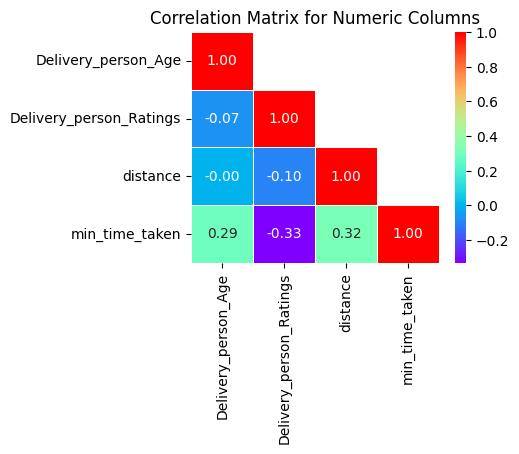

In [39]:
numeric_columns = ["Delivery_person_Age", "Delivery_person_Ratings", "distance", "min_time_taken"]

# Select only the numeric columns from the DataFrame
numeric_df = train_df_transformed[numeric_columns]

# Calculate the correlation matrix for the selected numeric columns
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(4,3))

# Create a mask to hide the upper triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Create a heatmap using seaborn with the 'rainbow' color map
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=.5, mask=mask)

# Set plot title
plt.title('Correlation Matrix for Numeric Columns')

# Show the plot
plt.show()


**Categorical Variables Analysis**

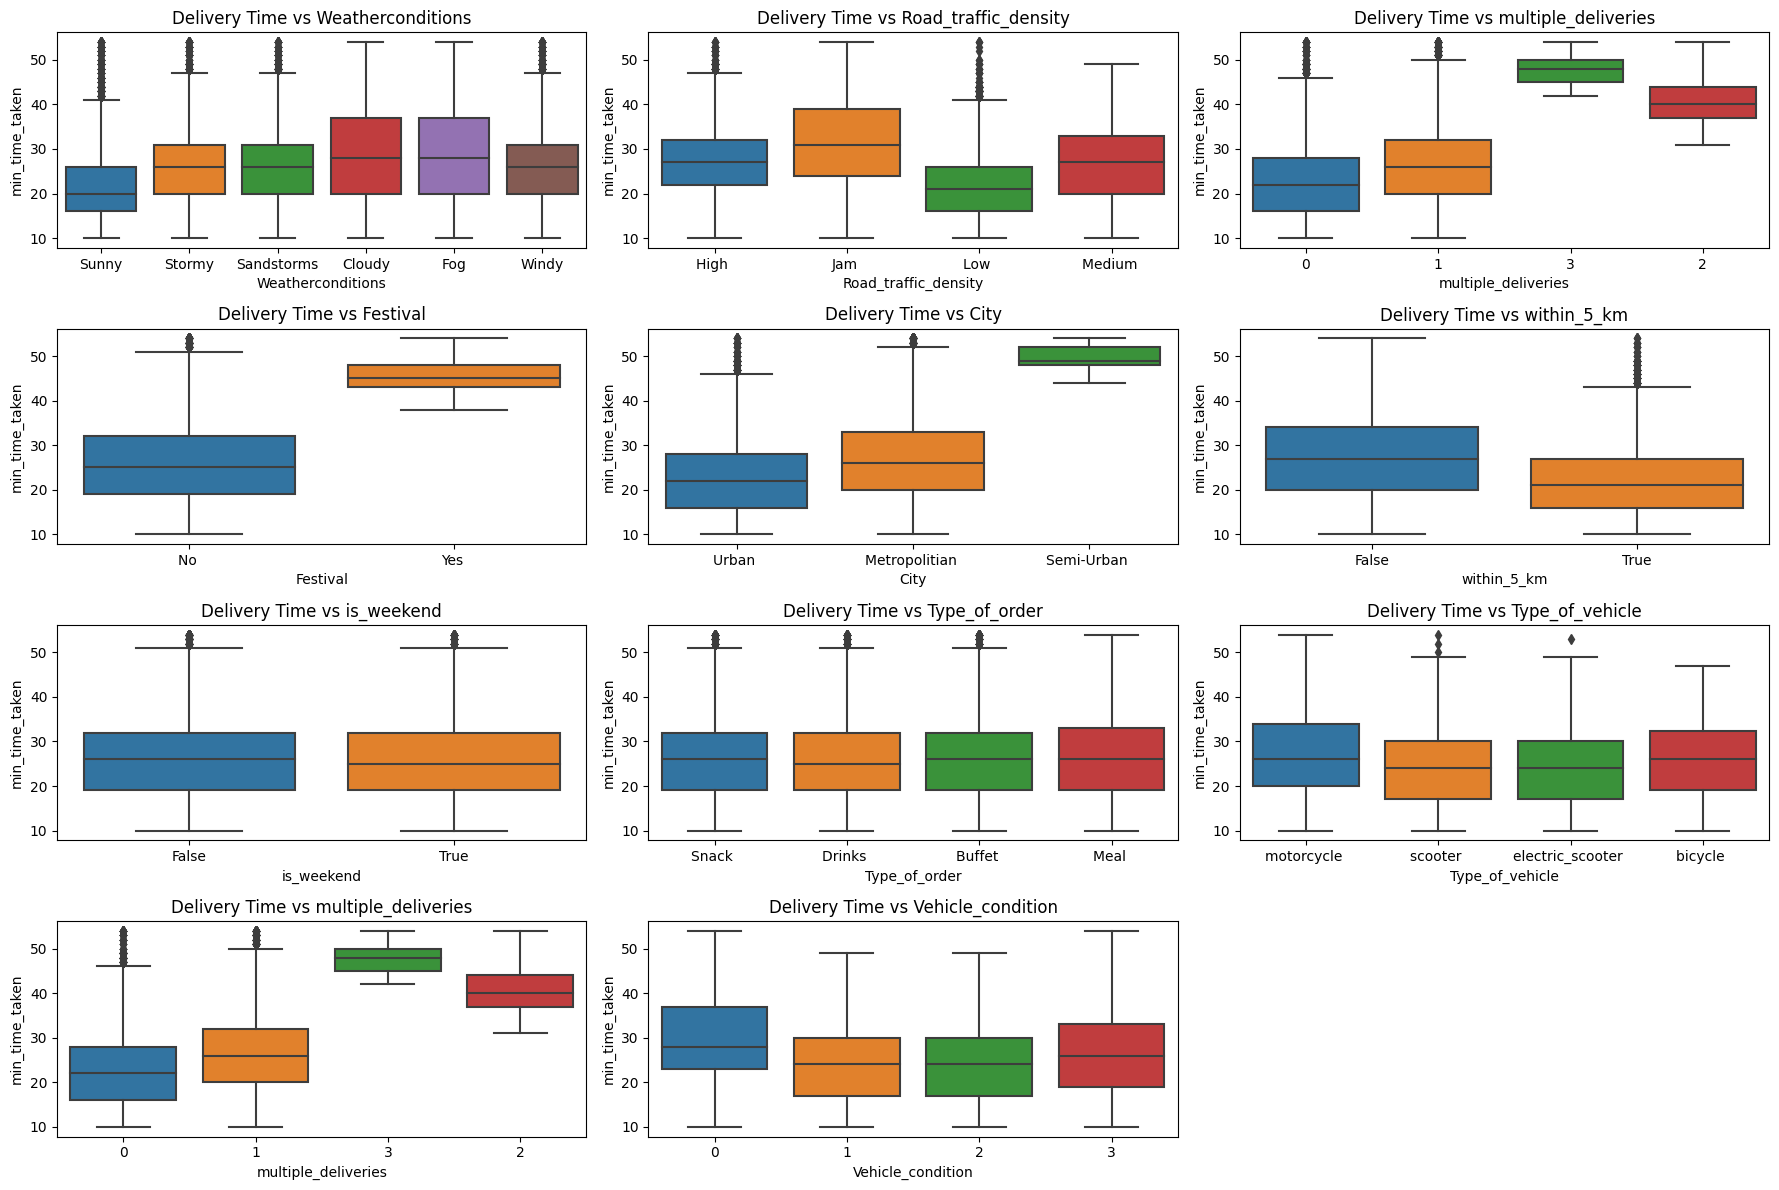

In [40]:
categorical_features = [	"Weatherconditions",	"Road_traffic_density",
                       "multiple_deliveries",	"Festival", "City", "within_5_km", "is_weekend",
                         "Type_of_order", "Type_of_vehicle", "multiple_deliveries", "Vehicle_condition"]

# Calculate the number of rows and columns dynamically
num_features = len(categorical_features)
num_rows = (num_features - 1) // 3 + 1  # 3 columns per row
num_cols = min(3, num_features)  # Maximum 3 columns

# Set up the matplotlib figure with multiple axes in two rows
fig, axes = plt.subplots(4, 3, figsize=(18, 12))

# Iterate through each categorical feature
for i, categorical_feature in enumerate(categorical_features):
    # Calculate row and column index for the subplot
    row_index = i // 3
    col_index = i % 3

    # Create a box plot between the categorical feature and delivery time
    sns.boxplot(ax=axes[row_index, col_index], x=categorical_feature, y='min_time_taken', data=train_df_transformed)

    # Set plot title
    axes[row_index, col_index].set_title(f'Delivery Time vs {categorical_feature}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()


# Remove empty subplots
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Show the plots
plt.show()


In [41]:
print(train_df_transformed["Order_Date"].dtype)

datetime64[ns]


⭐ I want to see the order rate over time. So, I am going to extract the month and year data from the dataset to analyze


In [42]:
# Extract month and year
train_df_transformed['Month'] = train_df_transformed['Order_Date'].dt.month
train_df_transformed['Year'] = train_df_transformed['Order_Date'].dt.year

In [43]:
train_df_transformed.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,multiple_deliveries,Festival,City,ID,Delivery_person_ID,Order_Date,...,Time_Order_picked,Vehicle_condition,Type_of_order,Type_of_vehicle,min_time_taken,distance,is_weekend,within_5_km,Month,Year
0,37,4.9,Sunny,High,0,No,Urban,0x4607,INDORES13DEL02,2022-03-19,...,11:45:00,2,Snack,motorcycle,24,3.020737,True,True,3,2022
1,34,4.5,Stormy,Jam,1,No,Metropolitian,0xb379,BANGRES18DEL02,2022-03-25,...,19:50:00,2,Snack,scooter,33,20.143737,False,False,3,2022
2,23,4.4,Sandstorms,Low,1,No,Urban,0x5d6d,BANGRES19DEL01,2022-03-19,...,08:45:00,0,Drinks,motorcycle,26,1.549693,True,True,3,2022
3,38,4.7,Sunny,Medium,1,No,Metropolitian,0x7a6a,COIMBRES13DEL02,2022-04-05,...,18:10:00,0,Buffet,motorcycle,21,7.774497,False,False,4,2022
4,32,4.6,Cloudy,High,1,No,Metropolitian,0x70a2,CHENRES12DEL01,2022-03-26,...,13:45:00,1,Snack,scooter,30,6.197898,True,False,3,2022


In [44]:
train_df_transformed["Year"].unique()

array([2022])

In [45]:
train_df_transformed["Month"].unique()

array([3, 4, 2])

💡 It is visible that the dataset only contains data from 2022 and the available months are three. Let's check which month had the highest sell.

**Finding Trend**

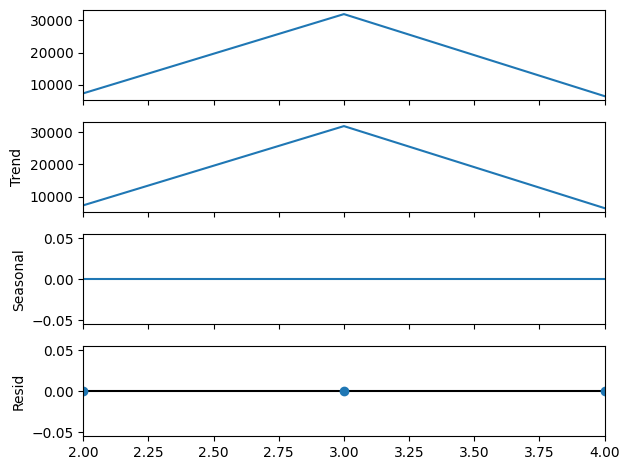

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Group by month and count orders
monthly_order_count = train_df_transformed.groupby('Month').size()

# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(monthly_order_count, model='additive', period=1)
result.plot()
plt.show()

**Count of orders per day**

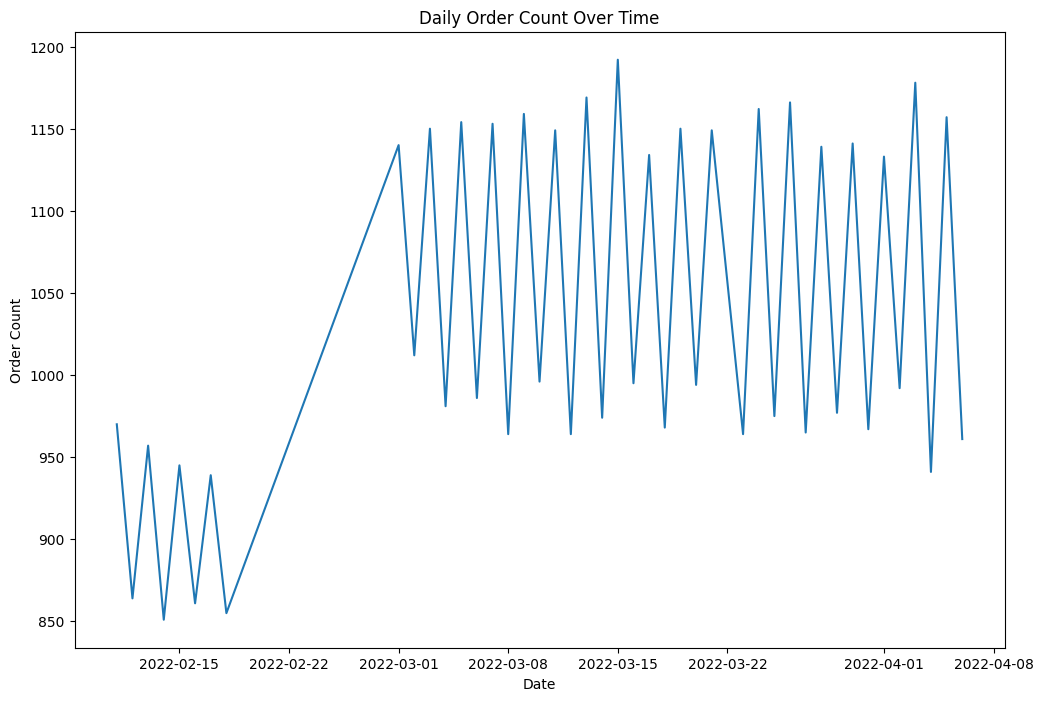

In [47]:
# Time series analysis
daily_order_count = train_df_transformed.groupby('Order_Date').size()

plt.figure(figsize=(12,8))
plt.plot(daily_order_count)
plt.title('Daily Order Count Over Time')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.show()


📈 It is visible that rate of order suddenly rises higher during the third month and stays still all over the month

**Weather Condition Around the Months**

<Figure size 1200x600 with 0 Axes>

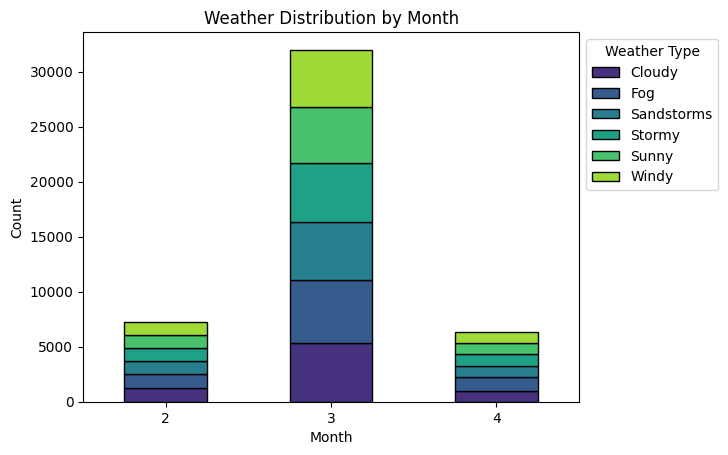

In [48]:
# Create a DataFrame with the count of each weather type in each month
weather_counts = train_df_transformed.groupby(['Month', 'Weatherconditions']).size().unstack(fill_value=0)

# Reorder the columns to have a consistent color mapping in the plot
weather_counts = weather_counts.reindex(columns=sorted(weather_counts.columns))

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
sns.set_palette("viridis", len(weather_counts.columns))
weather_counts.plot(kind='bar', stacked=True, edgecolor='black')
plt.title('Weather Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Weather Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

🌧 Variation in weather can be spotted in every month


**Use of Veichles over Weather**

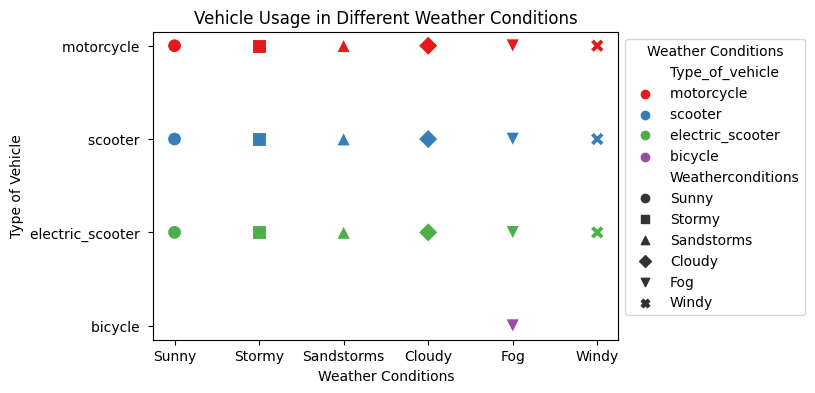

In [49]:
# Create a scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Weatherconditions',
    y='Type_of_vehicle',
    hue='Type_of_vehicle',
    style='Weatherconditions',
    data=train_df_transformed,
    palette='Set1',
    s=100,
    markers={'Sunny': 'o', 'Stormy': 's', 'Sandstorms': '^', 'Cloudy': 'D', 'Fog': 'v', 'Windy': 'X'},
)

plt.title('Vehicle Usage in Different Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Type of Vehicle')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

🌁 It can be clearly seen that the bicycle is only used in the foggy weather

# **Pre-Processing**

In [50]:
train_df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Delivery_person_Age      45593 non-null  int64         
 1   Delivery_person_Ratings  45593 non-null  float64       
 2   Weatherconditions        45593 non-null  object        
 3   Road_traffic_density     45593 non-null  object        
 4   multiple_deliveries      45593 non-null  object        
 5   Festival                 45593 non-null  object        
 6   City                     45593 non-null  object        
 7   ID                       45593 non-null  object        
 8   Delivery_person_ID       45593 non-null  object        
 9   Order_Date               45593 non-null  datetime64[ns]
 10  Time_Orderd              45593 non-null  object        
 11  Time_Order_picked        45593 non-null  object        
 12  Vehicle_condition        45593 n

🔵 From the correlations among the columns, we don't need certain columns to train our model to predict the minimum time taken to deliver order. We will create a new dataframe excluding those columns

In [51]:
cols_to_drop=["Delivery_person_ID", "Order_Date", "Time_Orderd", "Time_Order_picked",
              "Month", "Year", "ID", "Month", "Year", "is_weekend", "Type_of_order",
              "Type_of_vehicle", "Vehicle_condition", "Delivery_person_Ratings"]

In [52]:
# Create a new DataFrame by dropping the specified columns
new_df = train_df_transformed.drop(cols_to_drop, axis=1).copy()


In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Delivery_person_Age   45593 non-null  int64  
 1   Weatherconditions     45593 non-null  object 
 2   Road_traffic_density  45593 non-null  object 
 3   multiple_deliveries   45593 non-null  object 
 4   Festival              45593 non-null  object 
 5   City                  45593 non-null  object 
 6   min_time_taken        45593 non-null  Int64  
 7   distance              45593 non-null  float64
 8   within_5_km           45593 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(6)
memory usage: 3.2+ MB


**Label Encoding**

In [54]:
cols_to_encode= ["Weatherconditions", "Road_traffic_density", "Festival", "City",
                 "within_5_km"]

In [55]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

In [56]:
# Encode labels for each column in cols_to_encode
for col in cols_to_encode:
    new_df[col] = label_encoder.fit_transform(new_df[col])


In [57]:
new_df.head()

,Delivery_person_Age,Weatherconditions,Road_traffic_density,multiple_deliveries,Festival,City,min_time_taken,distance,within_5_km
0,37,4,0,0,0,2,24,3.020737,1
1,34,3,1,1,0,0,33,20.143737,0
2,23,2,2,1,0,2,26,1.549693,1
3,38,4,3,1,0,0,21,7.774497,0
4,32,0,0,1,0,0,30,6.197898,0


**Split The Data**

In [58]:
# Split the dataset into features (X) and target variable (y)
X = new_df.drop("min_time_taken", axis=1)
y = new_df["min_time_taken"]

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Apply ML Models**

**Linear Regression**

In [60]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
print("Linear Regression - R2 Score:", r2_score(y_test, linear_predictions))


Linear Regression - R2 Score: 0.40125023796014336


**Decision Tree**

In [61]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
print("Decision Tree - R2 Score:", r2_score(y_test, tree_predictions))


Decision Tree - R2 Score: 0.38292944746596114


**Random Forest**

In [62]:
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
print("Random Forest - R2 Score:", r2_score(y_test, forest_predictions))

Random Forest - R2 Score: 0.6209902236234175


**Support Vector Regressor**

In [63]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
print("SVR - R2 Score:", r2_score(y_test, svr_predictions))

SVR - R2 Score: 0.4120610710914393


**Gradiant Boost**

In [64]:
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
print("Gradient Boosting - R2 Score:", r2_score(y_test, gradient_boosting_predictions))

Gradient Boosting - R2 Score: 0.6522550393361641


**Lasso Regression**

In [65]:
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
print("Lasso Regression - R2 Score:", r2_score(y_test, lasso_predictions))

Lasso Regression - R2 Score: 0.3015647647388785


# **Using Grid Search**

In [66]:
# Define models and their respective parameter grids
models_and_params = [
    (LinearRegression(), {}),
    (Lasso(), {'alpha': [0.05, 0.02, 0.1, 0.5, 1.0, 2.0]}),
    (SVR(), {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5, 0.8]}),
    (DecisionTreeRegressor(), {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}),
    (RandomForestRegressor(), {'n_estimators': [50, 100, 200, 250]}),
    (GradientBoostingRegressor(), {'n_estimators': [50, 100, 200, 250], 'learning_rate': [0.01, 0.1, 0.2, 0.3]})
]

In [67]:
# Iterate over models and perform grid search
for model, param_grid in models_and_params:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")

    # Evaluate on the test set
    predictions = grid_search.best_estimator_.predict(X_test)
    r2 = r2_score(y_test, predictions)
    print(f"R2 Score on test set: {r2}")
    print("="*50)

Best parameters for LinearRegression: {}
R2 Score on test set: 0.40125023796014336
Best parameters for Lasso: {'alpha': 0.02}
R2 Score on test set: 0.40072374367930474
Best parameters for SVR: {'C': 10, 'epsilon': 0.1}
R2 Score on test set: 0.4561098496763111
Best parameters for DecisionTreeRegressor: {'max_depth': 10, 'min_samples_split': 10}
R2 Score on test set: 0.6797717916049342
Best parameters for RandomForestRegressor: {'n_estimators': 250}
R2 Score on test set: 0.6249978345364566
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.3, 'n_estimators': 200}
R2 Score on test set: 0.6672522270916936


# **Test By Providing Data**

**Make Input Data Frame**

In [68]:
input_df = pd.DataFrame({
    'Delivery_person_Age': [30],
    'Weatherconditions': [0],
    'Road_traffic_density': [0],
    'multiple_deliveries': [1],
    'Festival': [0],
    'City': [0],
    'distance': [6.1978],
    'within_5_km': [0]
})
# 32	0	0	1	0	0	/30/	6.197898	0


**Predict with default parameters**

In [69]:
# Use the trained models for prediction
linear_prediction = linear_model.predict(input_df)
tree_prediction = tree_model.predict(input_df)
forest_prediction = forest_model.predict(input_df)
gradient_prediction= gradient_boosting_model.predict(input_df)
lasso_prediction= lasso_model.predict(input_df)
svr_prediction= svr_model.predict(input_df)

In [70]:
# Display the predictions
print("Linear Regression Prediction:", linear_prediction[0])
print("Decision Tree Regression Prediction:", tree_prediction[0])
print("Random Forest Regression Prediction:", forest_prediction[0])
print("Gradient Boosting Prediction:", gradient_prediction[0])
print("Lasso Regressor Prediction:", lasso_prediction[0])
print("Support Vector Regressor Prediction:", svr_prediction[0])

Linear Regression Prediction: 31.942063307906658
Decision Tree Regression Prediction: 33.0
Random Forest Regression Prediction: 32.96
Gradient Boosting Prediction: 30.889515707692713
Lasso Regressor Prediction: 28.3782487665562
Support Vector Regressor Prediction: 30.51161750319903


✅ From the results, it is visible that for this specific data, **SVR** and **Gradient Boosting** are giving more accurate results.

# **Use Ensemble Model to Predict The Result**

**Use Mean value**

In [71]:
# Ensemble predictions using simple averaging
ensemble_prediction = np.mean([linear_prediction, tree_prediction, forest_prediction,
                               gradient_prediction, lasso_prediction, svr_prediction], axis=0)

# Display the ensemble prediction
print("Ensemble Prediction:", ensemble_prediction)

Ensemble Prediction: [31.28024088]


**Stacking**

In [72]:
# Define base models
base_models = [
    ('linear', linear_model),
    ('tree', tree_model),
    ('forest', forest_model),
    ('gradient', gradient_boosting_model),
    ('lasso', lasso_model),
    ('svr', svr_model)
]

In [73]:
# Define the meta-model
meta_model = LinearRegression()


In [74]:
# Create the stacking regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)


In [75]:
# Fit the stacking model with training data
stacking_model.fit(X_train, y_train)

# Make predictions
stacking_prediction = stacking_model.predict(input_df)

In [ ]:
print("Stacking Prediction:", stacking_prediction)

**Bagging**

In [ ]:
# Define the base model
base_model = DecisionTreeRegressor()

# Create the bagging regressor
bagging_model = BaggingRegressor(base_model, n_estimators=10, random_state=42)

# Fit the model with trainign data
bagging_model.fit(X_train, y_train)

# Make predictions
bagging_prediction = bagging_model.predict(input_df)

In [ ]:
print("Bagging Prediction:", bagging_prediction)

# **Implement Neural Network**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler

**Pre-Processing**

In [ ]:
# Split data into train, test and validatin data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values.reshape(-1, 1))
X_val_tensor = torch.FloatTensor(X_val_scaled)
y_val_tensor = torch.FloatTensor(y_val.values.reshape(-1, 1))

In [ ]:
# Convert data to PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

**Deep Neural Network**

In [84]:
# Build a feedforward neural network using PyTorch
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(X_train_scaled.shape[1], 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [85]:
# Instantiate the model
NN_model = RegressionNN()

In [86]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(NN_model.parameters(), lr=0.001)


In [87]:
# Train the model with validation
epochs = 10
for epoch in range(epochs):
    NN_model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = NN_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Evaluate on the validation set
    NN_model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for val_inputs, val_labels in val_loader:
            val_outputs = NN_model(val_inputs)
            val_loss += criterion(val_outputs, val_labels).item()
        val_loss /= len(val_loader)

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss}")


Epoch 1/10, Training Loss: 73.91332244873047, Validation Loss: 47.13091490226879
Epoch 2/10, Training Loss: 54.47701644897461, Validation Loss: 45.08644111365603
Epoch 3/10, Training Loss: 33.65260314941406, Validation Loss: 43.08797914605392
Epoch 4/10, Training Loss: 45.90052032470703, Validation Loss: 41.15180390675862
Epoch 5/10, Training Loss: 38.227264404296875, Validation Loss: 39.052105622542534
Epoch 6/10, Training Loss: 50.512027740478516, Validation Loss: 41.62279181564063
Epoch 7/10, Training Loss: 56.69956588745117, Validation Loss: 37.6989185467101
Epoch 8/10, Training Loss: 31.98694610595703, Validation Loss: 37.20191682179769
Epoch 9/10, Training Loss: 32.650840759277344, Validation Loss: 36.49852138987759
Epoch 10/10, Training Loss: 27.097431182861328, Validation Loss: 36.20422720323529


In [ ]:
# Final evaluation on the test set
NN_model.eval()
with torch.no_grad():
    y_pred_tensor = NN_model(X_val_tensor)
    r2 = r2_score(y_val_tensor.numpy(), y_pred_tensor.numpy())
    print("R2 Score on validation set:", r2)

In [89]:
input_scaled = scaler.transform(input_df)  # Scale the new data using the same scaler

# Convert to PyTorch tensor
input_tensor = torch.FloatTensor(input_scaled)

# Make predictions
NN_model.eval()
with torch.no_grad():
    y_pred_tensor = NN_model(input_tensor)

# Convert predictions to numpy array
y_pred_numpy = y_pred_tensor.numpy()

# Print or use the predictions as needed
print("Predicted Output:", y_pred_numpy)


Predicted Output: [[29.746572]]
Predicted Output: [[29.746572]]
